In [1]:
import tensorflow as tf

In [2]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.2.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6501555202438975158
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 429464324287560335
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10598201472
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16542643669194964727
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:09:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5197556130963322286
physical_device_desc: "device: XLA_GPU device"
]


In [4]:
tf.debugging.set_log_device_placement(True)

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import import_ipynb
import time_data_test_3 as readdata

importing Jupyter notebook from time_data_test_3.ipynb


In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, Masking, Bidirectional,Conv1D, MaxPooling1D
import tensorflow as tf
from sklearn.preprocessing import StandardScaler



<h1> normal data</h1>

In [8]:
#normal data를 그룹핑하고 100개가 넘는 그룹을 골라내기
groupset=[]
over_100_group=[]
for i in range(len(readdata.normal)):
    gb = readdata.normal[i].groupby(['_ws.col.Protocol','ip.src','ip.dst','tcp.srcport'])
    for key, group in gb:
        group = np.asarray(group)
        if len(group)>100:
            over_100_group.append(group)
        else :
            groupset.append(group)

In [9]:
for i in range(len(readdata.normal)):
    gb = readdata.normal[i].groupby(['_ws.col.Protocol','ip.src','ip.dst','tcp.dstport'])
    for key, group in gb:
        group = np.asarray(group)
        if len(group)>100:
            over_100_group.append(group)
        else :
            groupset.append(group)

In [10]:
#normal data 100개가 넘는 그룹 100개씩 잘라서 그룹셋에 넣기
for i in range(len(over_100_group)):
    for j in range(0,len(over_100_group[i]),100):
        groupset.append(over_100_group[i][j:j+100])

In [11]:
len(groupset)

103713

In [12]:
for i in range(len(groupset)):
    groupset[i][:,0]=groupset[i][:,0]-groupset[i][0][0]

In [13]:
#100개가 넘는것은 없는지 확인
for i in range(len(groupset)):
    if len(groupset[i])>100:
        print(i)

In [14]:
X=[]
for i in range(len(groupset)):
    temp=np.delete(groupset[i],[1,2,3,4,5],1)
    num=100-len(temp)
    X.append(np.pad(temp,((0,num),(0,0)),'constant', constant_values=-1))

In [15]:
X_data=np.asarray(X)

In [16]:
len(X_data)

103713

In [17]:
Y_data=[]
for i in range(len(X_data)):
    Y_data.append(0)

In [18]:
len(Y_data)

103713

In [19]:
X_data.shape

(103713, 100, 4)

In [20]:
groupset

[array([[0, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 49164, 128,
         485, 717],
        [181, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 49165, 128,
         485, 717],
        [359, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 49166, 128,
         485, 717],
        [579, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 49171, 128,
         485, 717],
        [760, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 49172, 128,
         485, 717],
        [939, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 49264, 128,
         485, 717]], dtype=object),
 array([[0, 'DCERPC', '192.168.10.14', '192.168.10.3', 49414, 135, 116, 1,
         1]], dtype=object),
 array([[0, 'DCERPC', '192.168.10.14', '192.168.10.3', 49415, 49666, 1749,
         1, 1],
        [0, 'DCERPC', '192.168.10.14', '192.168.10.3', 49415, 49666, 220,
         1750, 261],
        [0, 'DCERPC', '192.168.10.14', '192.168.10.3', 49415, 49666, 1705,
         2598, 1010],
        [0, 'DCERPC', '192.16

공격데이터

In [21]:
groupset_a=[]
over_100_group_a=[]
gb = readdata.attack.groupby(['_ws.col.Protocol','ip.src','ip.dst','tcp.srcport'])
for key, group in gb:
    group = np.asarray(group)
    if len(group)>100:
        over_100_group_a.append(group)
    else :
        groupset_a.append(group)


In [22]:
gb = readdata.attack.groupby(['_ws.col.Protocol','ip.src','ip.dst','tcp.dstport'])
for key, group in gb:
    group = np.asarray(group)
    if len(group)>100:
        over_100_group_a.append(group)
    else :
        groupset_a.append(group)


In [23]:
over_100_group_a

[array([[0, 'FTP', '192.168.10.50', ..., 20, 1, 1],
        [3, 'FTP', '192.168.10.50', ..., 34, 21, 15],
        [4, 'FTP', '192.168.10.50', ..., 23, 55, 26],
        ...,
        [165, 'FTP', '192.168.10.50', ..., 34, 21, 15],
        [165, 'FTP', '192.168.10.50', ..., 20, 1, 1],
        [165, 'FTP', '192.168.10.50', ..., 34, 21, 15]], dtype=object),
 array([[0, 'TCP', '192.168.10.50', ..., 0, 0, 1],
        [3, 'TCP', '192.168.10.50', ..., 0, 21, 15],
        [4, 'TCP', '192.168.10.50', ..., 0, 55, 26],
        ...,
        [165, 'TCP', '192.168.10.50', ..., 0, 0, 1],
        [165, 'TCP', '192.168.10.50', ..., 0, 21, 15],
        [165, 'TCP', '192.168.10.50', ..., 0, 55, 35]], dtype=object),
 array([[3, 'FTP', '172.16.0.1', ..., 14, 1, 21],
        [4, 'FTP', '172.16.0.1', ..., 11, 15, 55],
        [4, 'FTP', '172.16.0.1', ..., 6, 26, 78],
        ...,
        [165, 'FTP', '172.16.0.1', ..., 21, 15, 55],
        [165, 'FTP', '172.16.0.1', ..., 14, 1, 21],
        [165, 'FTP', '172.1

In [24]:
for i in range(len(over_100_group_a)):
    print(len(over_100_group_a[i]))

523
722
513
331


In [25]:
for i in range(len(over_100_group_a)):
    for j in range(0,len(over_100_group_a[i]),100):
        groupset_a.append(over_100_group_a[i][j:j+100])

In [26]:
groupset_a

[array([[3, 'FTP', '172.16.0.1', '192.168.10.50', 52108, 21, 14, 1, 21],
        [4, 'FTP', '172.16.0.1', '192.168.10.50', 52108, 21, 11, 15, 55],
        [4, 'FTP', '172.16.0.1', '192.168.10.50', 52108, 21, 6, 26, 78]],
       dtype=object),
 array([[87, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 14, 1, 21],
        [87, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 17, 15, 55],
        [91, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 14, 32, 77],
        [91, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 26, 46, 111],
        [94, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 14, 72, 133],
        [94, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 20, 86, 167],
        [97, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 14, 106,
         190]], dtype=object),
 array([[87, 'FTP', '172.16.0.1', '192.168.10.50', 52114, 21, 14, 1, 21],
        [87, 'FTP', '172.16.0.1', '192.168.10.50', 52114, 21, 20, 15, 55],
        [91, 'FTP', '172.16.0.1', '192.168.10.50', 521

In [27]:
for i in range(len(groupset_a)):
    groupset_a[i][:,0]=groupset_a[i][:,0]-groupset_a[i][0][0]

In [28]:
groupset_a

[array([[0, 'FTP', '172.16.0.1', '192.168.10.50', 52108, 21, 14, 1, 21],
        [1, 'FTP', '172.16.0.1', '192.168.10.50', 52108, 21, 11, 15, 55],
        [1, 'FTP', '172.16.0.1', '192.168.10.50', 52108, 21, 6, 26, 78]],
       dtype=object),
 array([[0, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 14, 1, 21],
        [0, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 17, 15, 55],
        [4, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 14, 32, 77],
        [4, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 26, 46, 111],
        [7, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 14, 72, 133],
        [7, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 20, 86, 167],
        [10, 'FTP', '172.16.0.1', '192.168.10.50', 52112, 21, 14, 106,
         190]], dtype=object),
 array([[0, 'FTP', '172.16.0.1', '192.168.10.50', 52114, 21, 14, 1, 21],
        [0, 'FTP', '172.16.0.1', '192.168.10.50', 52114, 21, 20, 15, 55],
        [4, 'FTP', '172.16.0.1', '192.168.10.50', 52114, 21, 1

In [29]:
X_a=[]
for i in range(len(groupset_a)):
    temp=np.delete(groupset_a[i],[1,2,3,4,5],1)
    num=100-len(temp)
    X_a.append(np.pad(temp,((0,num),(0,0)),'constant', constant_values=-1))

In [30]:
X_a

[array([[0, 14, 1, 21],
        [1, 11, 15, 55],
        [1, 6, 26, 78],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, 

In [31]:
Y_a=[]
for i in range(len(X_a)):
    Y_a.append(1)

In [32]:
X_attack_data=np.asarray(X_a)
Y_attack_data=np.asarray(Y_a)

In [33]:
X_total=np.concatenate((X_data,X_attack_data), axis=0)
#index : 0~891936 까지 normal, 총 891937

In [34]:
X_total.shape

(104072, 100, 4)

In [35]:
Y_total=np.concatenate((Y_data,Y_attack_data), axis=0)

In [36]:
Y_total.shape

(104072,)

In [37]:
# Conv1d 모델을 이용해 특징 맵 추출 후 가중치 부여, LSTM 단일 은닉층을 배치.

def build_model():
    learning_rate = 0.00001
    seq_length = 100
    data_dim = 4
    METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
    model = Sequential()

    model.add(Conv1D(256, 3, activation = 'relu', kernel_regularizer='l2', input_shape=(100, 4)))
    model.add(MaxPooling1D(pool_size=4))    
    model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
    model.add(LSTM(256))  
    model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))

    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=METRICS)
    
    return model

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
skf = StratifiedKFold(n_splits=10)
k=10

In [40]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [42]:
all_history=[]
all_acc=[]
all_f1=[]
matrix=[]

model =  build_model()
for train_index, test_index in skf.split(X_total,Y_total):
    #print('train_index : ', train_index,'\ntest_index : ',test_index)
    X_train = X_total[train_index]
    y_train = Y_total[train_index]  
    X_test = X_total[test_index]
    y_test = Y_total[test_index]

    sm = SMOTE()
    X_train=np.reshape(X_train,(len(X_train),400))

    X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
    X_train_oversampled=np.reshape(X_train_oversampled,(len(X_train_oversampled),100,4))
    history =model.fit(X_train_oversampled, y_train_oversampled,epochs=60, batch_size=256, verbose=1 )
    all_history.append(history.history)
    X_test=X_test.astype('float32')
    y_pred = model.predict(X_test)
    y_pred_binary=np.around(y_pred)
    
    acc=accuracy_score(y_test, y_pred_binary)
    all_acc.append(acc)
    
    f1=f1_score(y_test, y_pred_binary)
    all_f1.append(f1)
    
    matrix.append(confusion_matrix(y_test, y_pred_binary))
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    print(f'Accuracy: {acc}')
    print(f'f-score: {f1}')
    print(f'tn fp fn tp :{tn, fp, fn, tp}')

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/60
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing

730/730 [==============================] - 6s 9ms/step - loss: 0.1961 - accuracy: 1.0000
Epoch 52/60
730/730 [==============================] - 6s 9ms/step - loss: 0.1912 - accuracy: 0.9998
Epoch 53/60
730/730 [==============================] - 6s 9ms/step - loss: 0.1853 - accuracy: 1.0000
Epoch 54/60
730/730 [==============================] - 6s 9ms/step - loss: 0.1821 - accuracy: 0.9996
Epoch 55/60
730/730 [==============================] - 6s 9ms/step - loss: 0.1756 - accuracy: 0.9999
Epoch 56/60
730/730 [==============================] - 6s 9ms/step - loss: 0.1704 - accuracy: 0.9999
Epoch 57/60
730/730 [==============================] - 6s 9ms/step - loss: 0.1643 - accuracy: 1.0000
Epoch 58/60
730/730 [==============================] - 6s 9ms/step - loss: 0.1568 - accuracy: 1.0000
Epoch 59/60
730/730 [==============================] - 6s 9ms/step - loss: 0.1489 - accuracy: 0.9998
Epoch 60/60
730/730 [==============================] - 6s 9ms/step - loss: 0.1422 - accuracy: 0.9999
Ex

730/730 [==============================] - 6s 9ms/step - loss: 0.0657 - accuracy: 1.0000
Epoch 52/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0648 - accuracy: 1.0000
Epoch 53/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0655 - accuracy: 0.9996
Epoch 54/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0630 - accuracy: 1.0000
Epoch 55/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0620 - accuracy: 1.0000
Epoch 56/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0608 - accuracy: 1.0000
Epoch 57/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0677 - accuracy: 0.9983
Epoch 58/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0604 - accuracy: 0.9998
Epoch 59/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0587 - accuracy: 1.0000
Epoch 60/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0582 - accuracy: 1.0000
Ex

730/730 [==============================] - 6s 9ms/step - loss: 0.0370 - accuracy: 1.0000
Epoch 56/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0370 - accuracy: 0.9999
Epoch 57/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0420 - accuracy: 0.9989
Epoch 58/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0389 - accuracy: 0.9995
Epoch 59/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0365 - accuracy: 0.9999
Epoch 60/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0360 - accuracy: 1.0000
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU

730/730 [==============================] - 6s 9ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 60/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0242 - accuracy: 1.0000
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/dev

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Accuracy: 0.9992312866339963
f-score: 0.8787878787878789
tn fp fn tp :(10370, 1, 7, 29)
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Accuracy: 1.0
f-score: 1.0
tn fp fn tp :(10371, 0, 0, 36)
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/60
730/730 [=====================

Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 2/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0162 - accuracy: 0.9999
Epoch 3/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 4/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 5/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 

Epoch 1/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0165 - accuracy: 0.9997
Epoch 2/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 3/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 4/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 5/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 6/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0150 - accuracy: 0.9999
Epoch 7/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0150 - accuracy: 0.9999
Epoch 8/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 9/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 10/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0147 - accuracy: 1.0000

730/730 [==============================] - 6s 9ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 6/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0168 - accuracy: 0.9994
Epoch 7/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 8/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 9/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 10/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 11/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 12/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 13/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 14/60
730/730 [==============================] - 6s 9ms/step - loss: 0.0212 - accuracy: 0.9986
Epoch 

In [43]:
model.save('network_security.h5')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0


In [44]:
print(all_acc)
print(all_f1)
for i in range(k):
    print(matrix[i][0][0],matrix[i][0][1],matrix[i][1][0],matrix[i][1][1])

[0.9995196003074558, 1.0, 0.9999039108292496, 0.9995195541462477, 0.9992312866339963, 1.0, 1.0, 1.0, 1.0, 0.9980782165849909]
[0.9350649350649352, 1.0, 0.9855072463768115, 0.9350649350649352, 0.8787878787878789, 1.0, 1.0, 1.0, 1.0, 0.6153846153846153]
10367 5 0 36
10372 0 0 36
10372 0 1 34
10366 5 0 36
10370 1 7 29
10371 0 0 36
10371 0 0 36
10371 0 0 36
10371 0 0 36
10371 0 20 16


In [45]:
print(sum(all_acc)/10)
print(sum(all_f1)/10)
for i in range(k):
    print(matrix[i][0][0],matrix[i][0][1],matrix[i][1][0],matrix[i][1][1])

0.9996252568501941
0.9349809610679175
10367 5 0 36
10372 0 0 36
10372 0 1 34
10366 5 0 36
10370 1 7 29
10371 0 0 36
10371 0 0 36
10371 0 0 36
10371 0 0 36
10371 0 20 16


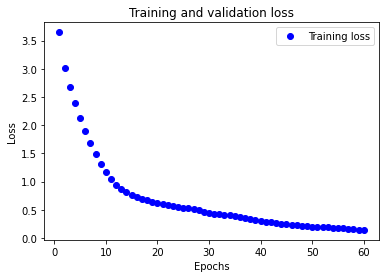

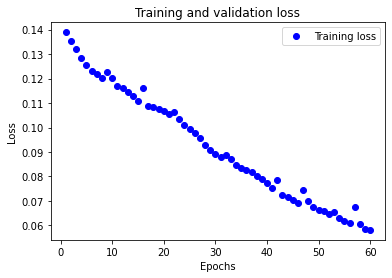

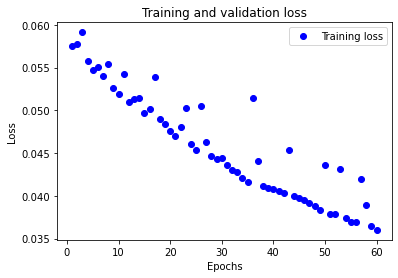

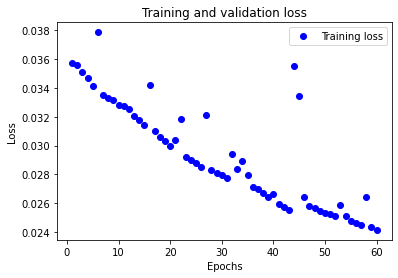

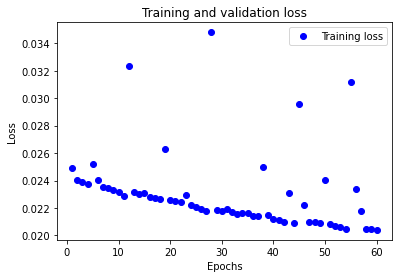

In [46]:
for i in range(5):
    loss =all_history[i]['loss']
    #val_loss = all_history[i]['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
    #plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [47]:
test_data=pd.read_csv('test_dataset_01.csv',error_bad_lines=False)

b'Skipping line 1000426: expected 22 fields, saw 23\n'
b'Skipping line 1279004: expected 22 fields, saw 23\n'
b'Skipping line 3023273: expected 22 fields, saw 27\n'
b'Skipping line 3074890: expected 22 fields, saw 27\n'
b'Skipping line 3460738: expected 22 fields, saw 23\n'


In [48]:
test_data=test_data.iloc[:,0:9]

In [49]:
test_data.columns=['_ws.col.UTCtime',"_ws.col.Protocol","ip.src","ip.dst","tcp.srcport","tcp.dstport","tcp.len","tcp.seq","tcp.ack"]

In [50]:
test_data=test_data.sort_values(by='_ws.col.UTCtime')

In [51]:
test_data['_ws.col.UTCtime']=pd.to_datetime(test_data['_ws.col.UTCtime'])
test_data['_ws.col.UTCtime']=test_data['_ws.col.UTCtime'].astype(np.int64)// 10**9

In [52]:
test_data['_ws.col.UTCtime']=test_data['_ws.col.UTCtime']-test_data.iloc[0,0]

In [53]:
test_data= test_data.dropna(axis=0) #결측값 삭제
test_data=test_data.astype({"_ws.col.UTCtime":'int','tcp.srcport': 'int','tcp.dstport': 'int','tcp.len': 'int','tcp.seq':'int','tcp.ack': 'int'})

In [54]:
test_data

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack
2598772,0,TCP,192.168.10.50,172.16.0.1,21,52258,0,189,129
729836,0,TCP,192.168.10.50,172.16.0.1,21,52260,0,189,116
2945998,0,FTP,172.16.0.1,192.168.10.50,52282,21,20,15,55
777192,0,FTP,172.16.0.1,192.168.10.50,52276,21,20,15,55
422592,0,TCP,172.16.0.1,192.168.10.50,52280,21,0,1,1
...,...,...,...,...,...,...,...,...,...
3156453,27656,TCP,192.168.10.19,23.61.187.27,48301,80,0,1297,5888
2370156,27656,TLSv1.2,192.168.10.19,71.74.176.101,40676,443,328,353,3962
1585251,27656,TLSv1.2,71.74.176.101,192.168.10.19,443,40676,566,3962,681
530566,27656,TLSv1.2,192.168.10.19,71.74.176.101,40676,443,373,681,4528


In [55]:
groupset=[]
over_100_group=[]
gb = test_data.groupby(['_ws.col.Protocol','ip.src','ip.dst','tcp.srcport'])
for key, group in gb:
    group = np.asarray(group)
    if len(group)>100:
        over_100_group.append(group)
    else :
        groupset.append(group)

In [56]:
gb = test_data.groupby(['_ws.col.Protocol','ip.src','ip.dst','tcp.dstport'])
for key, group in gb:
    group = np.asarray(group)
    if len(group)>100:
        over_100_group.append(group)
    else :
        groupset.append(group)

In [57]:
for i in range(len(over_100_group)):
    for j in range(0,len(over_100_group[i]),100):
        groupset.append(over_100_group[i][j:j+100])

In [58]:
len(groupset)

409211

In [59]:
for i in range(len(groupset)):
    groupset[i][:,0]=groupset[i][:,0]-groupset[i][0][0]

In [60]:
groupset

[array([[0, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 64459, 128,
         485, 717],
        [180, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 65089, 128,
         485, 717],
        [360, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 49364, 128,
         485, 717],
        [540, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 50128, 128,
         485, 717],
        [540, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 50128, 128,
         485, 717],
        [720, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 50666, 128,
         485, 717],
        [900, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 51167, 128,
         485, 717],
        [900, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 51167, 128,
         485, 717],
        [1080, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 51736,
         128, 485, 717],
        [1080, 'DCERPC', '192.168.10.12', '192.168.10.25', 139, 51736,
         128, 485, 717],
        [1260, 'DCERPC', '192.168.10.12', '192.168

In [61]:
X=[]
for i in range(len(groupset)):
    temp=np.delete(groupset[i],[1,2,3,4,5],1)
    num=100-len(temp)
    X.append(np.pad(temp,((0,num),(0,0)),'constant', constant_values=-1))

In [62]:
X_data=np.asarray(X)

In [63]:
X_data

array([[[0, 128, 485, 717],
        [180, 128, 485, 717],
        [360, 128, 485, 717],
        ...,
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1]],

       [[0, 160, 773, 983],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        ...,
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1]],

       [[0, 116, 1, 1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        ...,
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1]],

       ...,

       [[0, 9, 130, 604],
        [0, 76, 139, 631],
        [0, 86, 215, 631],
        ...,
        [275, 92, 11479, 670],
        [275, 45, 11571, 670],
        [279, 86, 11616, 670]],

       [[0, 45, 11702, 670],
        [8, 70, 11747, 670],
        [8, 45, 11817, 670],
        ...,
        [248, 96, 18099, 686],
        [248, 45, 18195, 686],
        [249, 71, 18240, 686]],

       [[0, 45, 18311, 686],
        [3, 83, 18356, 686],
        [3, 45, 18439, 

In [64]:
X_data=X_data.astype('float32')

In [65]:
predict =model.predict(X_data)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ConcatV2 in device /job:localhost/replica:0/task:0/device:GPU:0


In [66]:
print(X_data.shape, predict.shape)

(409211, 100, 4) (409211, 1)


In [67]:
y_pred_binary=np.around(predict)

In [68]:
pred_attack_ix=[]
for i in range(len(y_pred_binary)):
    if y_pred_binary[i]==1:
        pred_attack_ix.append(i)

In [69]:
print(len(pred_attack_ix))

175


In [70]:
for index in pred_attack_ix:
    for i in range(len(groupset[index])):
        print(groupset[index][i][2],groupset[index][i][3],groupset[index][i][4],groupset[index][i][5],groupset[index][i][1])

172.16.0.1 192.168.10.50 52276 21 FTP
172.16.0.1 192.168.10.50 52276 21 FTP
172.16.0.1 192.168.10.50 52276 21 FTP
172.16.0.1 192.168.10.50 52276 21 FTP
172.16.0.1 192.168.10.50 52276 21 FTP
172.16.0.1 192.168.10.50 52276 21 FTP
172.16.0.1 192.168.10.50 52276 21 FTP
172.16.0.1 192.168.10.50 52278 21 FTP
172.16.0.1 192.168.10.50 52278 21 FTP
172.16.0.1 192.168.10.50 52278 21 FTP
172.16.0.1 192.168.10.50 52278 21 FTP
172.16.0.1 192.168.10.50 52278 21 FTP
172.16.0.1 192.168.10.50 52278 21 FTP
172.16.0.1 192.168.10.50 52278 21 FTP
172.16.0.1 192.168.10.50 52280 21 FTP
172.16.0.1 192.168.10.50 52280 21 FTP
172.16.0.1 192.168.10.50 52280 21 FTP
172.16.0.1 192.168.10.50 52280 21 FTP
172.16.0.1 192.168.10.50 52280 21 FTP
172.16.0.1 192.168.10.50 52280 21 FTP
172.16.0.1 192.168.10.50 52280 21 FTP
172.16.0.1 192.168.10.50 52282 21 FTP
172.16.0.1 192.168.10.50 52282 21 FTP
172.16.0.1 192.168.10.50 52282 21 FTP
172.16.0.1 192.168.10.50 52282 21 FTP
172.16.0.1 192.168.10.50 52282 21 FTP
172.16.0.1 1

192.168.10.9 46.105.203.17 4593 80 TCP
192.168.10.9 46.105.203.17 4648 80 TCP
192.168.10.9 46.105.203.17 4648 80 TCP
192.168.10.9 46.105.203.17 4648 80 TCP
192.168.10.9 46.105.203.17 4648 80 TCP
192.168.10.9 46.105.203.17 4716 80 TCP
192.168.10.9 46.105.203.17 4716 80 TCP
192.168.10.9 46.105.203.17 4716 80 TCP
192.168.10.9 46.105.203.17 4716 80 TCP
192.168.10.9 46.105.203.17 4716 80 TCP
192.168.10.9 46.105.203.17 4716 80 TCP
192.168.10.9 46.105.203.17 4716 80 TCP
192.168.10.9 46.105.203.17 4716 80 TCP
192.168.10.9 46.105.203.17 4750 80 TCP
192.168.10.9 46.105.203.17 4750 80 TCP
192.168.10.9 46.105.203.17 4750 80 TCP
192.168.10.9 46.105.203.17 4750 80 TCP
192.168.10.9 63.251.24.69 4623 80 TCP
192.168.10.9 63.251.24.69 4623 80 TCP
192.168.10.9 63.251.24.69 4623 80 TCP
192.168.10.9 63.251.24.69 4623 80 TCP
192.168.10.9 67.217.177.126 4104 80 TCP
192.168.10.9 67.217.177.126 4104 80 TCP
192.168.10.9 67.217.177.126 4104 80 TCP
192.168.10.9 67.217.177.126 4104 80 TCP
192.168.10.9 75.98.68.168

In [71]:
import csv
f = open('network.csv','w', newline='')
wr = csv.writer(f)

In [72]:
for index in pred_attack_ix:
    for i in range(len(groupset[index])):
        wr.writerow([groupset[index][i][2],groupset[index][i][3],groupset[index][i][4],groupset[index][i][5],groupset[index][i][1]])

In [73]:
f.close()